In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df=pd.read_csv('telematics_data.csv')
df.columns

Index(['year', 'month', 'day', 'vin', 'wmi', 'engine_cd', 'device_type',
       'msg_ts', 'vin_utc_key', 'packet_id', 'reason_code', 'script_version',
       'deviceid', 'latitude', 'longitude', 'driveridcode1', 'obdvin',
       'vehiclebattvolts', 'fuel_total', 'engine_rpm', 'coolant_tmp',
       'fuel_lvl_pct', 'driving_tme_sec', 'cruise_tme_sec', 'idle_tme_sec',
       'idle_fuel_total', 'pto_tme_total', 'pto_fuel_total', 'gear',
       'fuel_tmp', 'oil_tmpl', 'throt_pos', 'mpg', 'acel_pos',
       'engine_pct_load', 'torque', 'oil_lvl', 'oil_psi', 'coolant_psi',
       'intak_air_tmp', 'manifold_tmp', 'vehiclespeed', 'heading',
       'odometerinmeters', 'odometer'],
      dtype='object')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514994 entries, 0 to 514993
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              514994 non-null  int64  
 1   month             514994 non-null  int64  
 2   day               514994 non-null  int64  
 3   vin               514994 non-null  object 
 4   wmi               514994 non-null  object 
 5   engine_cd         514994 non-null  object 
 6   device_type       514994 non-null  object 
 7   msg_ts            514994 non-null  object 
 8   vin_utc_key       514994 non-null  object 
 9   packet_id         514994 non-null  int64  
 10  reason_code       514994 non-null  int64  
 11  script_version    389569 non-null  float64
 12  deviceid          487753 non-null  object 
 13  latitude          487710 non-null  float64
 14  longitude         487748 non-null  float64
 15  driveridcode1     487608 non-null  float64
 16  obdvin            48

In [23]:
df.drop(columns=["year", "month", "day"], inplace=True)

In [ ]:
categorical_features = df.select_dtypes(include=['object', 'category']).drop(columns=['vin','msg_ts'], errors='ignore')
print(categorical_features.columns.tolist())


['wmi', 'engine_cd', 'device_type', 'vin_utc_key', 'deviceid', 'obdvin']


In [25]:
df.drop(columns=categorical_features.columns, inplace=True)

In [26]:
# Step 4: Drop specific columns if they exist
cols_to_drop = ['packet_id', 'script_version', 'driveridcode1', 'odometer']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

# Step 5: Drop columns that have ALL null values
df.dropna(axis=1, how='all', inplace=True)

# Step 6: Print remaining columns
print("Remaining columns:", df.columns)

Remaining columns: Index(['vin', 'msg_ts', 'reason_code', 'latitude', 'longitude',
       'vehiclebattvolts', 'fuel_total', 'engine_rpm', 'coolant_tmp',
       'fuel_lvl_pct', 'driving_tme_sec', 'idle_tme_sec', 'idle_fuel_total',
       'pto_tme_total', 'pto_fuel_total', 'gear', 'fuel_tmp', 'oil_tmpl',
       'throt_pos', 'acel_pos', 'engine_pct_load', 'torque', 'oil_lvl',
       'oil_psi', 'coolant_psi', 'intak_air_tmp', 'manifold_tmp',
       'vehiclespeed', 'heading', 'odometerinmeters'],
      dtype='object')


In [12]:

df.isnull().sum()/len(df)*100

vin                  0.000000
msg_ts               0.000000
reason_code          0.000000
latitude             0.000000
longitude            0.000000
vehiclebattvolts     8.787405
fuel_total           9.556950
engine_rpm           0.000000
coolant_tmp          8.829979
idle_tme_sec         9.676971
idle_fuel_total      9.680394
pto_tme_total        9.688738
pto_fuel_total       9.706067
gear                13.147946
fuel_tmp            28.001215
oil_tmpl             8.771573
throt_pos            8.798102
acel_pos            28.032023
engine_pct_load      5.662371
torque               5.738534
oil_lvl             27.959069
oil_psi              8.836611
coolant_psi         28.032237
intak_air_tmp        8.730711
manifold_tmp         8.640855
vehiclespeed         3.422197
heading              6.485402
odometerinmeters     3.396096
dtype: float64

In [27]:
df.drop(columns=["driving_tme_sec", "fuel_lvl_pct"], inplace=True)

In [11]:
df['vin'].value_counts()

vin
3HSDZTZR5LN134290    33082
1HSERTZRXLH809470     9637
3HSDZTZRXLN395656     6809
3HSDZTZRXLN085409     6314
3HCDZTZR1LL880100     6209
                     ...  
3HSDWTZR9LN845337     3712
3HSDWTZR1LN845199     3674
3HSDWTZR9KN310622     3660
3HSDWTZR0LN844822     3642
3HSDWTZR5LN845108     3638
Name: count, Length: 100, dtype: int64

In [28]:
df = df.dropna(subset=['latitude', 'longitude','heading','gear'])

In [29]:
features = [
    "vehiclebattvolts", "fuel_total", "coolant_tmp", "idle_tme_sec", "idle_fuel_total",
    "pto_tme_total", "pto_fuel_total", "fuel_tmp", "oil_tmpl", "throt_pos",
    "acel_pos", "engine_pct_load", "torque", "oil_lvl", "oil_psi",
    "coolant_psi", "intak_air_tmp", "manifold_tmp", "vehiclespeed",
    "heading", "odometerinmeters"
]

for feature in features:
    df[feature] = df[feature].interpolate(method='linear', limit_direction='both').bfill().ffill()

In [16]:
df['msg_ts']

0         18-04-2020 06:50
1         20-05-2020 03:01
2         01-04-2020 20:02
3         05-05-2020 06:17
4         07-04-2020 20:14
                ...       
514986    25-04-2020 00:48
514987    08-04-2020 14:12
514991    09-05-2020 11:12
514992    16-04-2020 04:27
514993    18-04-2020 13:15
Name: msg_ts, Length: 382664, dtype: object

In [30]:
df['msg_ts'] = pd.to_datetime(df['msg_ts'], format="%d-%m-%Y %H:%M")
df.sort_values(by='msg_ts',inplace=True)
df['msg_ts'].head()
df.reset_index(drop=True, inplace=True)
df['msg_ts'].head()

0   2020-04-01
1   2020-04-01
2   2020-04-01
3   2020-04-01
4   2020-04-01
Name: msg_ts, dtype: datetime64[ns]

In [18]:
print(df['reason_code'].value_counts())

reason_code
9    382664
Name: count, dtype: int64


In [31]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.head()

reason_code   latitude   longitude  vehiclebattvolts  fuel_total  \
0            9  33.482211 -112.869629              13.9    186776.0   
1            9  34.871776 -114.818512              14.1     83536.0   
2            9  39.048740  -95.081636              14.1     58115.0   
3            9  39.657708  -84.235397              14.0     86745.0   
4            9  41.381602  -82.204743              14.1     66907.0   

   engine_rpm  coolant_tmp  idle_tme_sec  idle_fuel_total  pto_tme_total  ...  \
0        1354         83.0     1669500.0           1658.5            0.0  ...   
1        1489         84.0     6223500.0           4295.0            0.0  ...   
2        1402         83.0     1596600.0            984.0            0.0  ...   
3        1312         83.0     2115360.0           1457.0            0.0  ...   
4        1370         83.0     1850760.0           1213.0            0.0  ...   

   engine_pct_load  torque  oil_lvl  oil_psi  coolant_psi  intak_air_tmp  \
0              0.0     0.0      0.0    420.0          0.0           29.0   
1              0.0     0.0      0.0    452.0          0.0           28.0   
2              0.0     0.0      0.0    392.0          0.0           22.0   
3            100.0    99.0      0.0    364.0          0.0           10.0   
4             80.0    79.0      0.0    342.0          0.0            6.0   

   manifold_tmp  vehiclespeed  heading  odometerinmeters  
0          48.0        1095.0   1049.0       284213580.0  
1          43.0        1106.0    693.0       265633380.0  
2          43.0        1118.0   2431.0       171161820.0  
3          51.0        1046.0   1721.0       244667820.0  
4          32.0        1094.0    778.0        16939310.0  

[5 rows x 26 columns]

In [32]:
df.sort_values(by='msg_ts',inplace=True,ascending=False)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382664 entries, 382663 to 0
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   vin               382664 non-null  object        
 1   msg_ts            382664 non-null  datetime64[ns]
 2   reason_code       382664 non-null  int64         
 3   latitude          382664 non-null  float64       
 4   longitude         382664 non-null  float64       
 5   vehiclebattvolts  382664 non-null  float64       
 6   fuel_total        382664 non-null  float64       
 7   engine_rpm        382664 non-null  int64         
 8   coolant_tmp       382664 non-null  float64       
 9   idle_tme_sec      382664 non-null  float64       
 10  idle_fuel_total   382664 non-null  float64       
 11  pto_tme_total     382664 non-null  float64       
 12  pto_fuel_total    382664 non-null  float64       
 13  gear              382664 non-null  float64       
 14  fuel_tmp 

reason_code              NaN
latitude           -0.028619
longitude          -0.053333
vehiclebattvolts    0.029162
fuel_total          0.009090
engine_rpm         -0.526160
coolant_tmp        -0.233682
idle_tme_sec        0.201102
idle_fuel_total     0.189162
pto_tme_total      -0.029531
pto_fuel_total     -0.036786
gear                1.000000
fuel_tmp           -0.035234
oil_tmpl           -0.268862
throt_pos          -0.186765
acel_pos            0.032138
engine_pct_load    -0.220499
torque             -0.262770
oil_lvl                  NaN
oil_psi            -0.372934
coolant_psi              NaN
intak_air_tmp       0.200896
manifold_tmp        0.196734
vehiclespeed       -0.577190
heading             0.059646
odometerinmeters    0.014664
Name: gear, dtype: float64


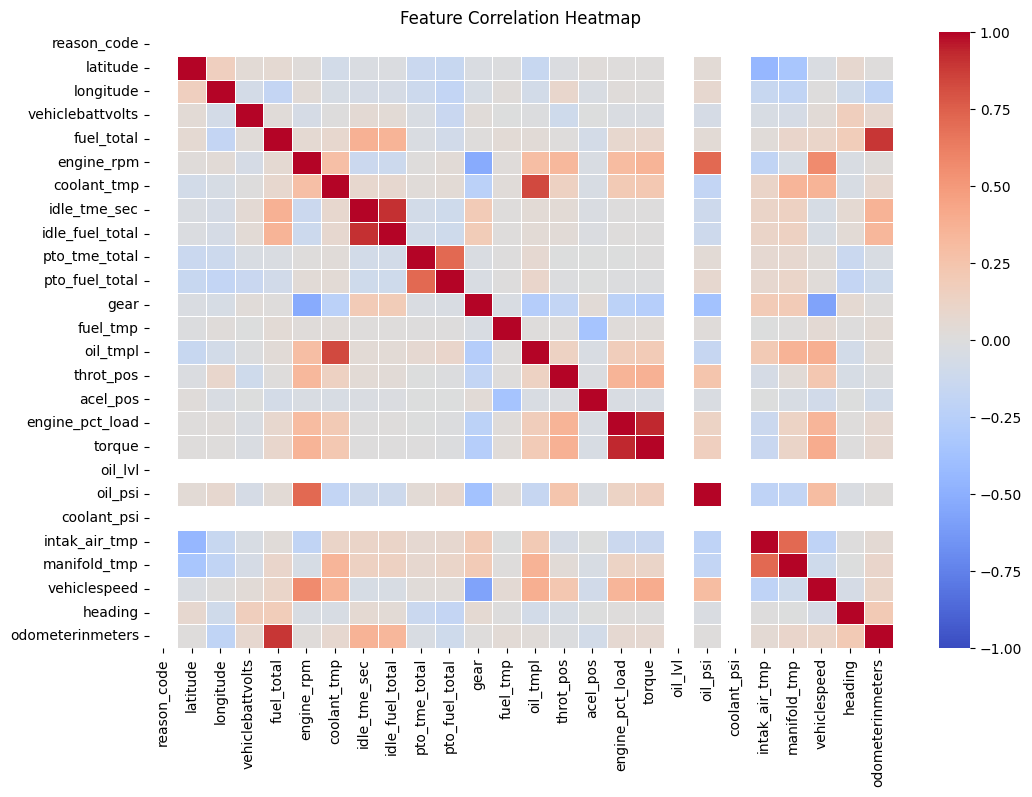

In [37]:
correlation_matrix = df.corr(numeric_only=True)

# Display the correlation matrix
print(correlation_matrix['gear'])

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1,vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

In [35]:
df['vin']

382663    3HSDZTZR0LN291791
382662    3HCDZTZR1ML681274
382661    3HSDZTZR0KN354211
382660    3HSDWTZR9LN810071
382659    3HSDZTZR0LN630677
                ...        
1         3HSDZTZR5LN134290
5         3HSDZTZR4KN126504
6         3HSDZTZR3LN164114
7         3HSDWTZR8LN845149
0         3HSDWTZR0LN844822
Name: vin, Length: 382664, dtype: object

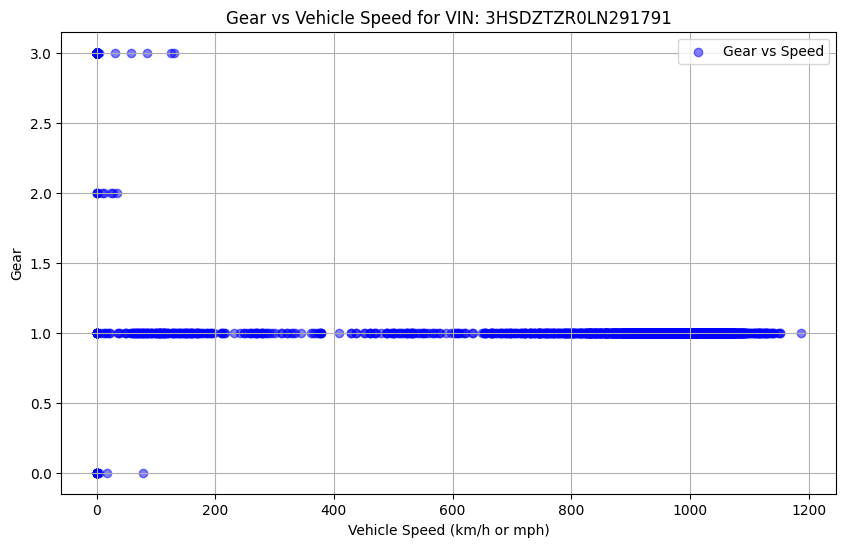

In [36]:
df_vin = df[df['vin'] == '3HSDZTZR0LN291791']

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_vin['vehiclespeed'], df_vin['gear'], alpha=0.5, color='b', label='Gear vs Speed')

# Labels and title
plt.xlabel("Vehicle Speed (km/h or mph)")
plt.ylabel("Gear")
plt.title(f"Gear vs Vehicle Speed for VIN: {'3HSDZTZR0LN291791'}")
plt.legend()
plt.grid(True)
plt.show()

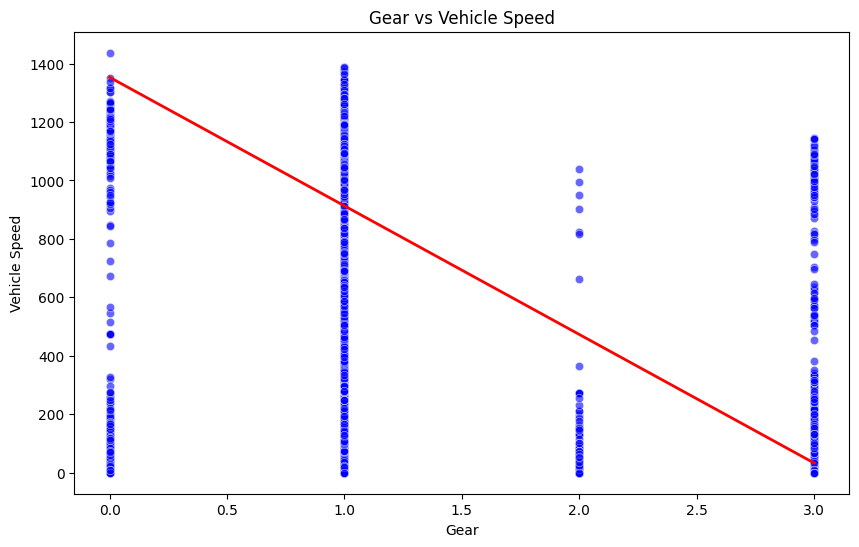

In [38]:
plt.figure(figsize=(10,6))

# Scatter plot to show data points
sns.scatterplot(x='gear', y='vehiclespeed', data=df, color='blue', alpha=0.6)

# Optionally, you can add a regression line to see the continuous relationship
sns.regplot(x='gear', y='vehiclespeed', data=df, scatter=False, color='red', line_kws={'linewidth': 2})

# Add labels and title
plt.title('Gear vs Vehicle Speed')
plt.xlabel('Gear')
plt.ylabel('Vehicle Speed')

# Show the plot
plt.show()

In [40]:
df['vehiclespeed']

382663    1049.0
382662     973.0
382661       0.0
382660     906.0
382659    1047.0
           ...  
1         1106.0
5          868.0
6         1089.0
7          505.0
0         1095.0
Name: vehiclespeed, Length: 382664, dtype: float64

In [42]:
max_acel_pos = df['acel_pos'].max()
min_acel_pos = df['acel_pos'].min()
print(f"Maximum value of acel_pos: {max_acel_pos}")
print(f"Minimum value of acel_pos: {min_acel_pos}")

Maximum value of acel_pos: 97.0
Minimum value of acel_pos: 0.0


In [43]:
max_vehiclespeed = df['vehiclespeed'].max()

# Calculate the minimum value of vehiclespeed
min_vehiclespeed = df['vehiclespeed'].min()

# Print the results
print(f"Maximum value of vehiclespeed: {max_vehiclespeed}")
print(f"Minimum value of vehiclespeed: {min_vehiclespeed}")

Maximum value of vehiclespeed: 1437.0
Minimum value of vehiclespeed: 0.0


In [ ]:
df['vehiclespeed_kmh'] = df['vehiclespeed'] * 0.036

TypeError: 'DataFrame' object is not callable

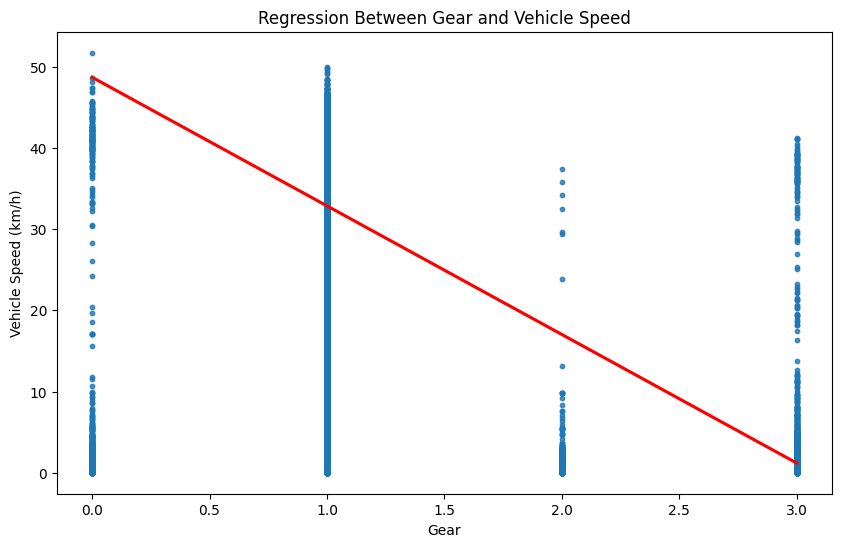

In [47]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df['gear'], y=df['vehiclespeed_kmh'], scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel('Gear')
plt.ylabel('Vehicle Speed (km/h)')
plt.title('Regression Between Gear and Vehicle Speed')

# Show the plot
plt.show()

In [55]:
df[['gear','vehiclespeed']].reset_index().drop(columns = ['index'],axis = 1, inplace=True)

In [56]:
df[['gear','vehiclespeed']]

gear  vehiclespeed
382663   1.0        1049.0
382662   1.0         973.0
382661   3.0           0.0
382660   1.0         906.0
382659   1.0        1047.0
...      ...           ...
1        1.0        1106.0
5        1.0         868.0
6        1.0        1089.0
7        1.0         505.0
0        1.0        1095.0

[382664 rows x 2 columns]

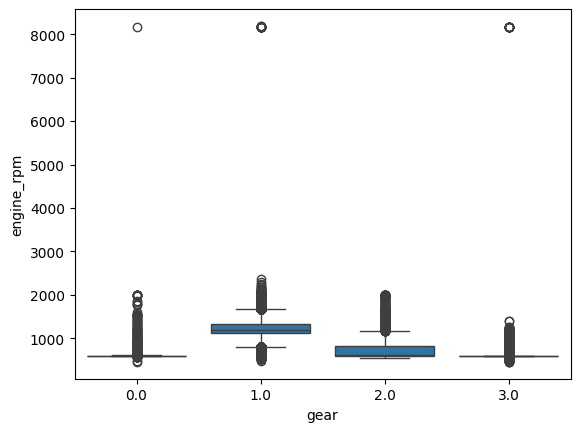

In [58]:
import matplotlib.pyplot as plt
sns.boxplot(x=df['gear'],y=df['engine_rpm'])
plt.show()

In [67]:
df['idle_tme_sec'].reset_index().drop('index', axis=1)

idle_tme_sec
0          2267640.0
1          1012860.0
2          1973340.0
3          2739330.0
4          1059750.0
...              ...
382659     6223500.0
382660     1974600.0
382661     1755540.0
382662     1403100.0
382663     1669500.0

[382664 rows x 1 columns]

In [71]:
vin_to_analyze = "3HSDZTZR0KN354211"  # Replace with the actual VIN
vin_df = df[df['vin'] == vin_to_analyze].copy()

# Find indices where 'gear' is 0 two consecutive times
vin_df['gear_shift'] = vin_df['gear'].shift(1)
vin_df['gear_zero_flag'] = (vin_df['gear'] == 0) & (vin_df['gear_shift'] == 0)

# Get indices of these occurrences
gear_zero_indices = vin_df[vin_df['gear_zero_flag']].index.tolist()

# Debugging step: Print the found indices
print("Consecutive 'gear=0' found at indices:", gear_zero_indices)

if len(gear_zero_indices) >= 2:
    start_idx = gear_zero_indices[0]  # Start after first occurrence
    end_idx = gear_zero_indices[1]    # End at second occurrence
    trip_df = vin_df.loc[start_idx:end_idx]

    # Plot Vehicle Speed vs Gear
    plt.figure(figsize=(10, 5))
    plt.plot(trip_df['vehiclespeed'], trip_df['gear'], marker='o', linestyle='-')

    # Labels and title
    plt.xlabel("Vehicle Speed (km/h)")
    plt.ylabel("Gear")
    plt.title(f"Vehicle Speed vs Gear for VIN {vin_to_analyze} (Single Trip)")
    plt.grid(True)

    # Show the plot
    plt.show()
else:
    print("Not enough consecutive 'gear = 0' occurrences to identify a trip.")

Consecutive 'gear=0' found at indices: [60529]
Not enough consecutive 'gear = 0' occurrences to identify a trip.


In [68]:
df['vin']

382663    3HSDZTZR0LN291791
382662    3HCDZTZR1ML681274
382661    3HSDZTZR0KN354211
382660    3HSDWTZR9LN810071
382659    3HSDZTZR0LN630677
                ...        
1         3HSDZTZR5LN134290
5         3HSDZTZR4KN126504
6         3HSDZTZR3LN164114
7         3HSDWTZR8LN845149
0         3HSDWTZR0LN844822
Name: vin, Length: 382664, dtype: object

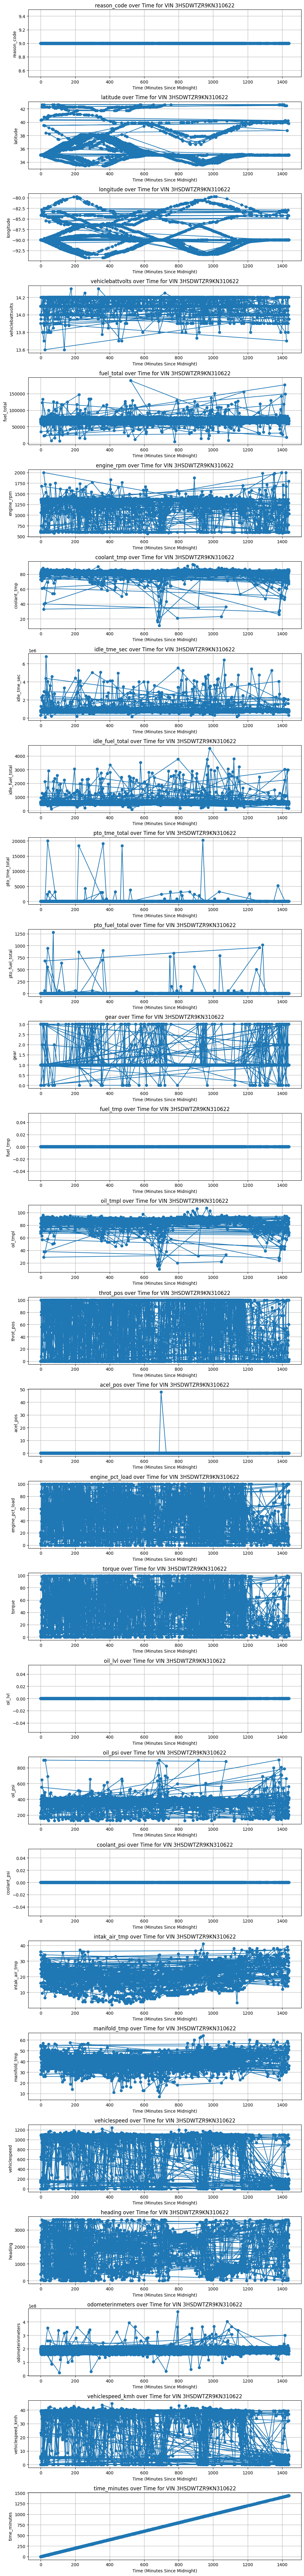

In [83]:
vin_to_analyze = "3HSDWTZR9KN310622"  # Replace with actual VIN

vin_df = df[df['vin'] == vin_to_analyze].copy()

# Convert msg_ts to datetime if not already
vin_df['msg_ts'] = pd.to_datetime(vin_df['msg_ts'], errors='coerce')

# Convert time to minutes since midnight
vin_df['time_minutes'] = (vin_df['msg_ts'].dt.hour * 60) + vin_df['msg_ts'].dt.minute + (vin_df['msg_ts'].dt.second / 60)

# Drop non-numeric columns except time_minutes
non_numeric_cols = ['vin', 'msg_ts']  # Keep time_minutes for plotting
numeric_features = vin_df.select_dtypes(include=['number']).columns.drop(non_numeric_cols, errors='ignore')

# Set figure size dynamically based on the number of plots
num_features = len(numeric_features)
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, num_features * 3))

# Plot each feature against time_minutes
for i, feature in enumerate(numeric_features):
    ax = axes[i] if num_features > 1 else axes
    ax.plot(vin_df['time_minutes'], vin_df[feature], marker='o', linestyle='-')
    ax.set_xlabel("Time (Minutes Since Midnight)")
    ax.set_ylabel(feature)
    ax.set_title(f"{feature} over Time for VIN {vin_to_analyze}")
    ax.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [ ]:
# Filter rows where fuel_tmp is 0
zero_fuel_tmp_df = df[df['fuel_tmp'] == 0]

# Group by VIN and count rows
fuel_tmp_zero_counts = zero_fuel_tmp_df.groupby('vin').size().reset_index(name='zero_fuel_tmp_count')

# Display result
min_val = fuel_tmp_zero_counts['zero_fuel_tmp_count'].min()
print(fuel_tmp_zero_counts[fuel_tmp_zero_counts['zero_fuel_tmp_count'] == min_val])
 

                  vin  zero_fuel_tmp_count
35  3HSDWTZR9KN310622                 3065


In [84]:
df[df['vin']=='3HSDWTZR9KN310622']['msg_ts']

379282   2020-05-30 11:59:00
379261   2020-05-30 11:54:00
379201   2020-05-30 11:44:00
379171   2020-05-30 11:39:00
379149   2020-05-30 11:34:00
                 ...        
409      2020-04-01 00:56:00
331      2020-04-01 00:46:00
295      2020-04-01 00:41:00
142      2020-04-01 00:21:00
35       2020-04-01 00:06:00
Name: msg_ts, Length: 3065, dtype: datetime64[ns]

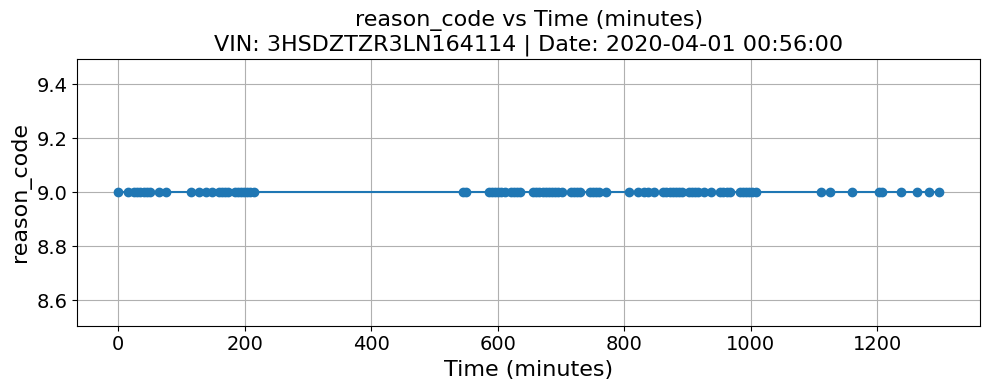

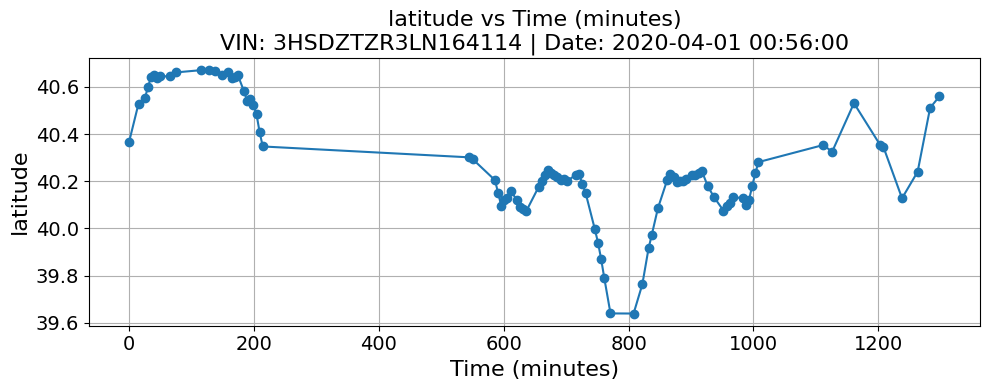

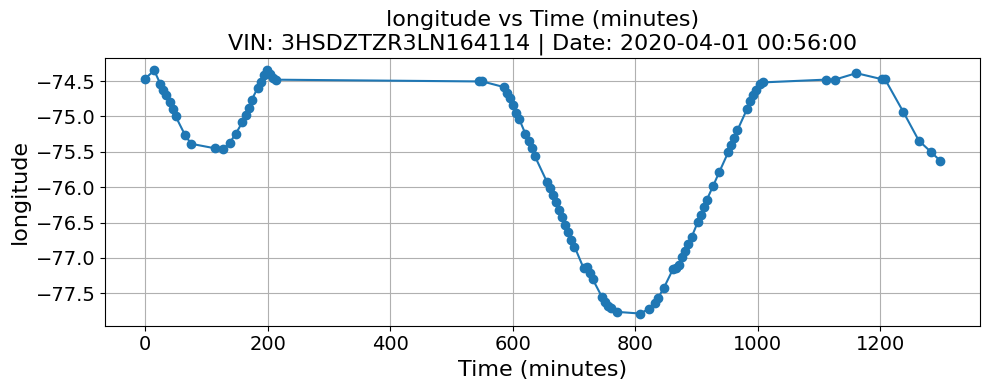

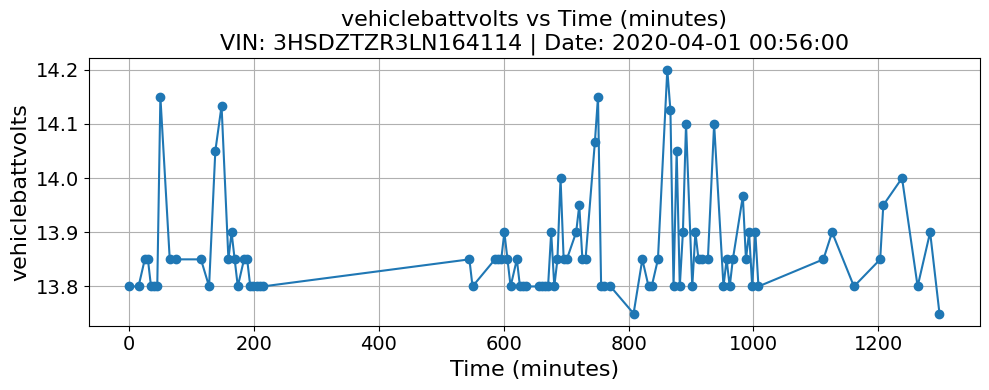

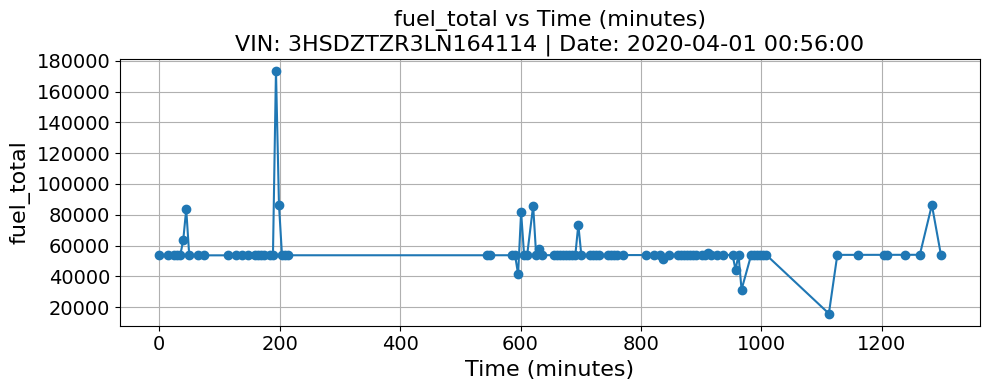

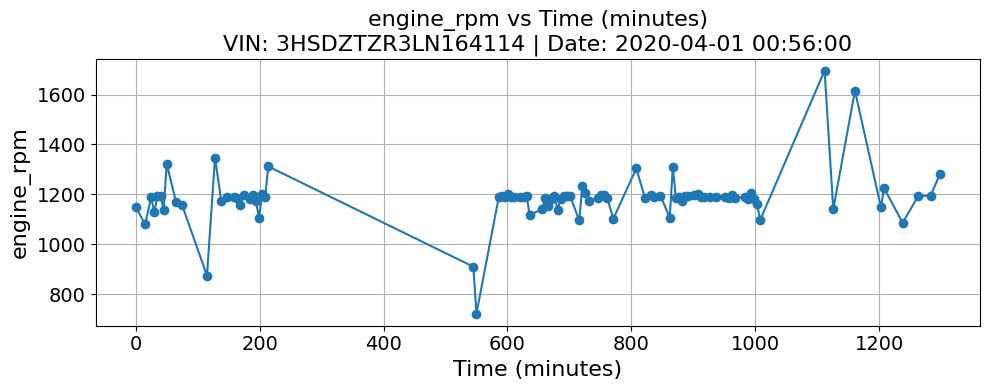

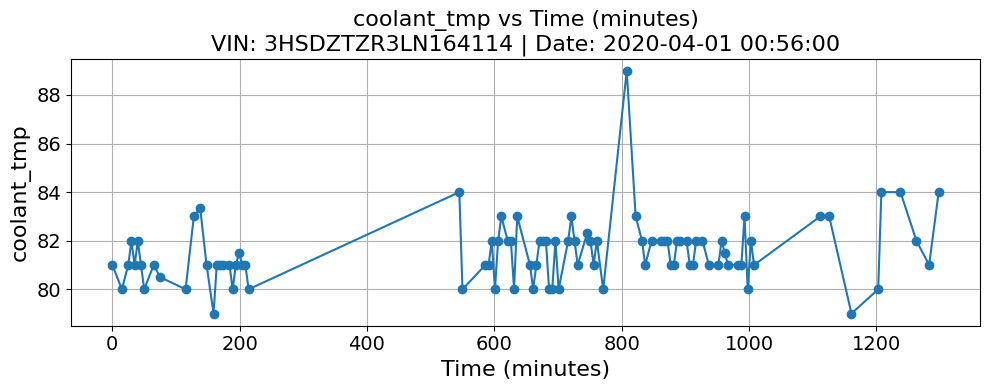

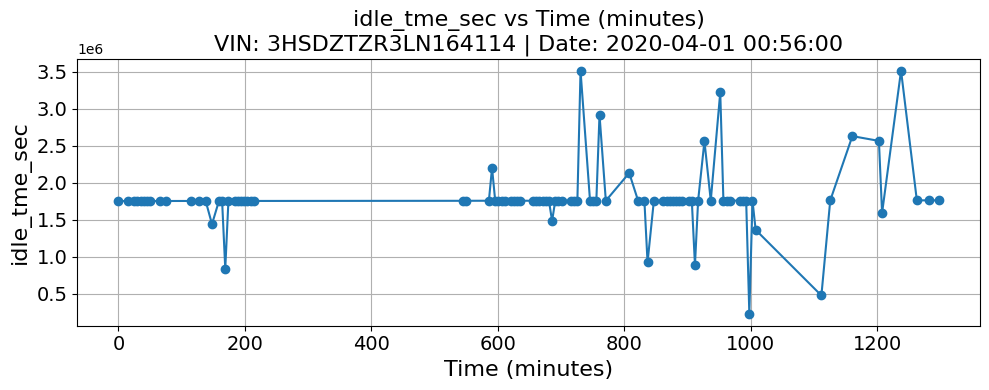

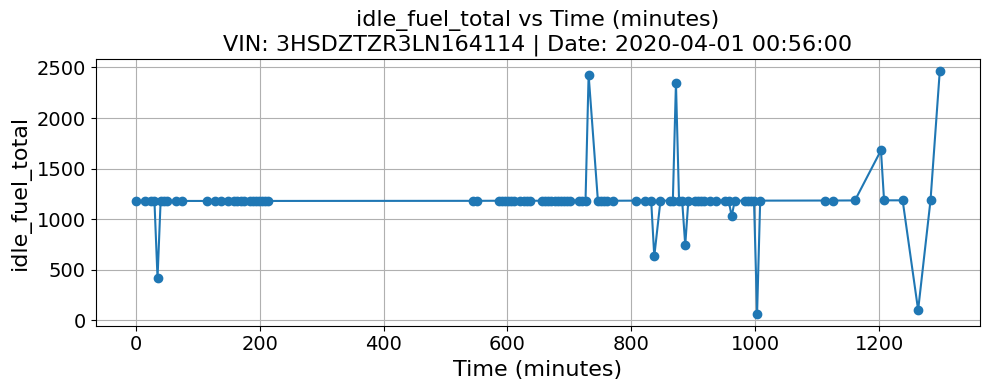

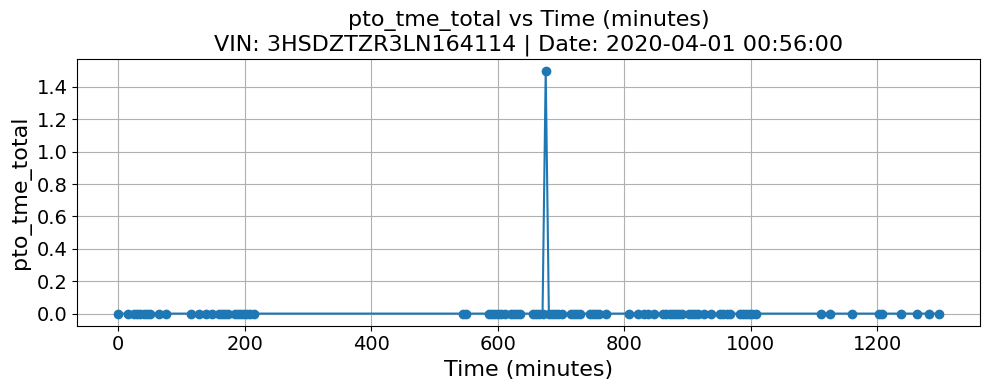

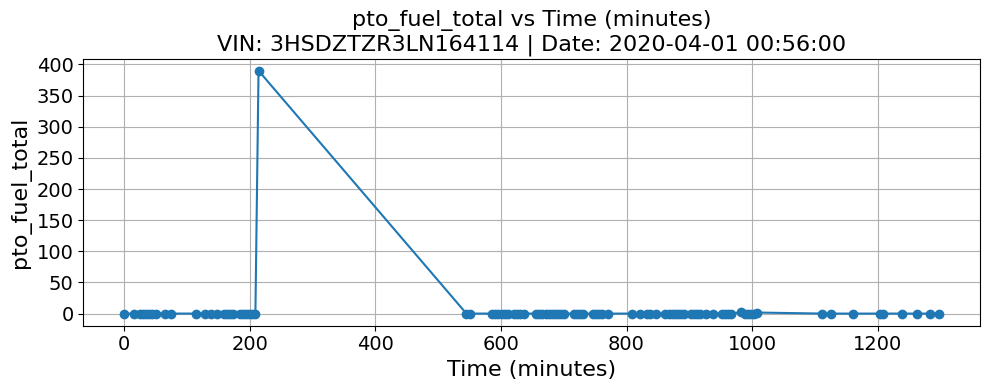

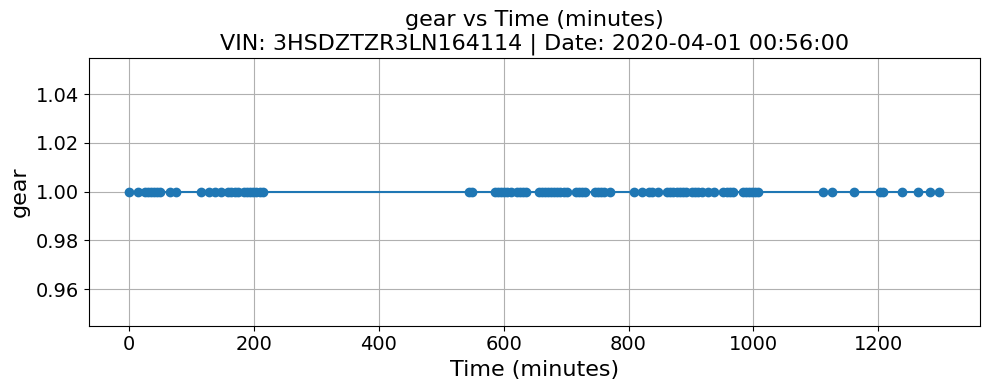

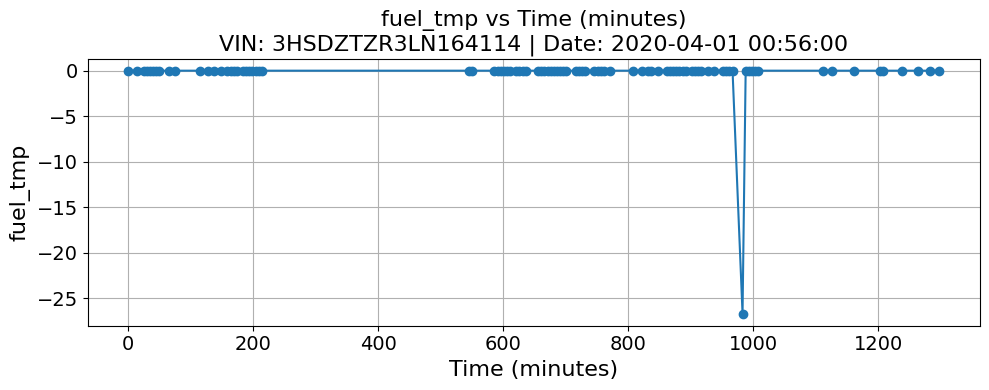

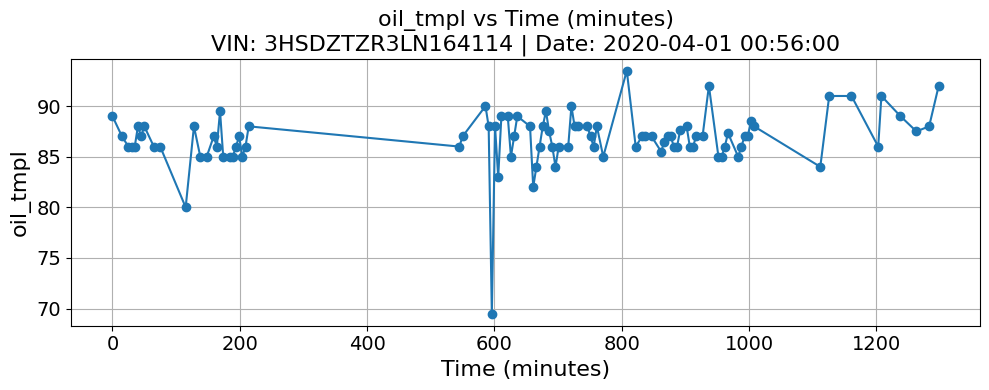

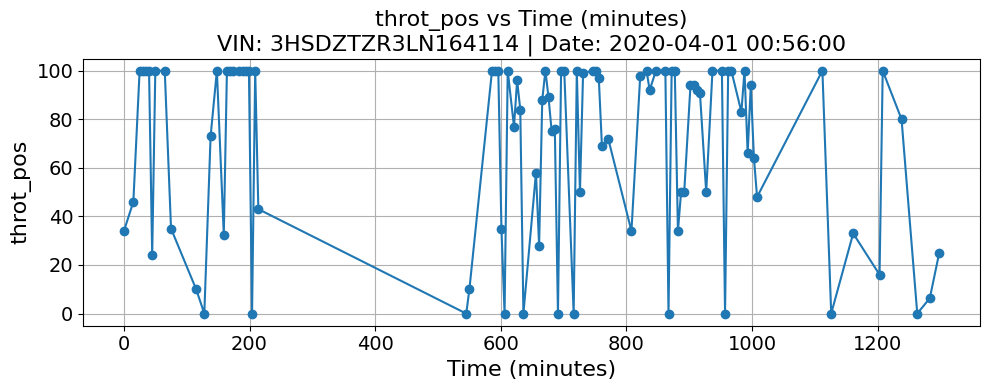

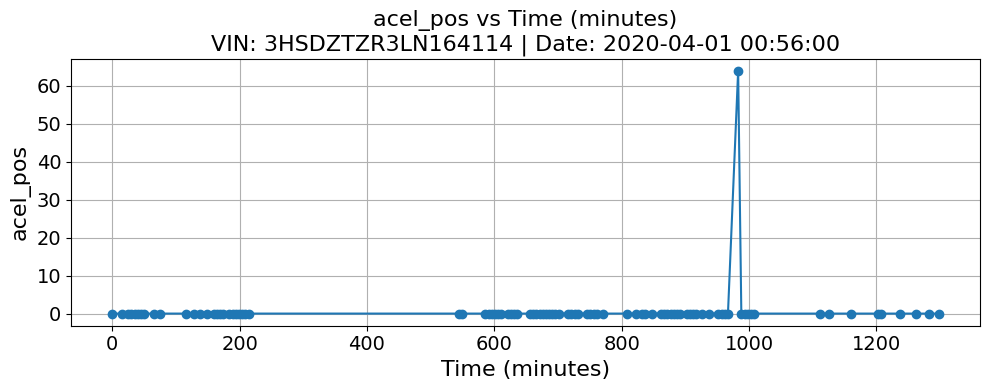

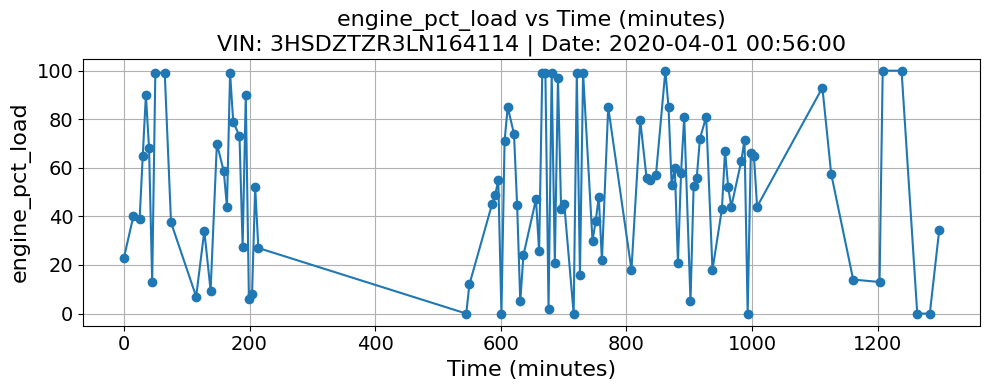

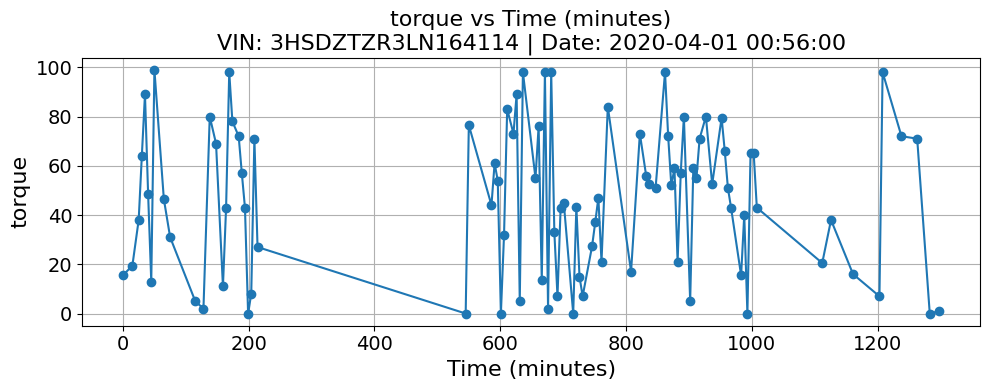

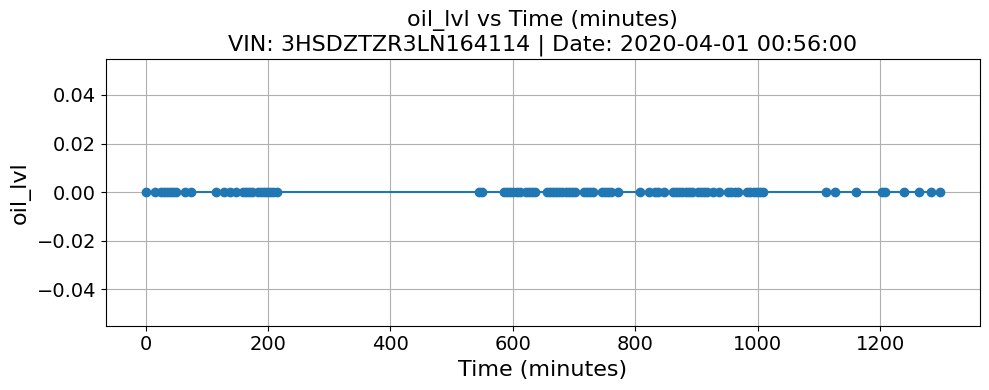

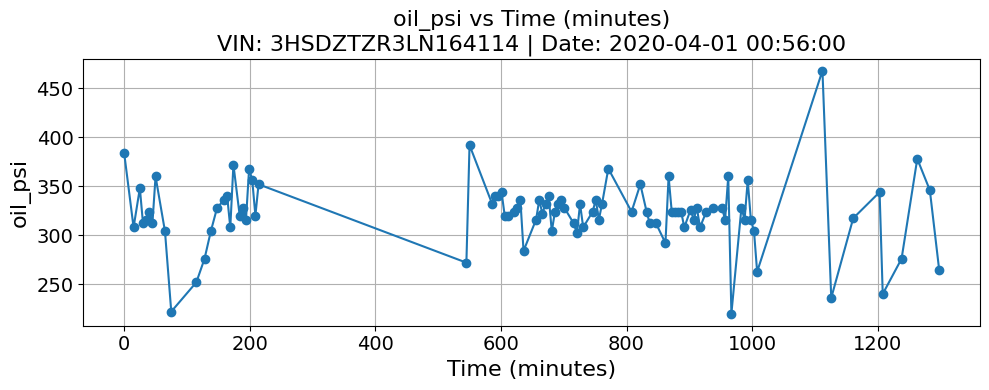

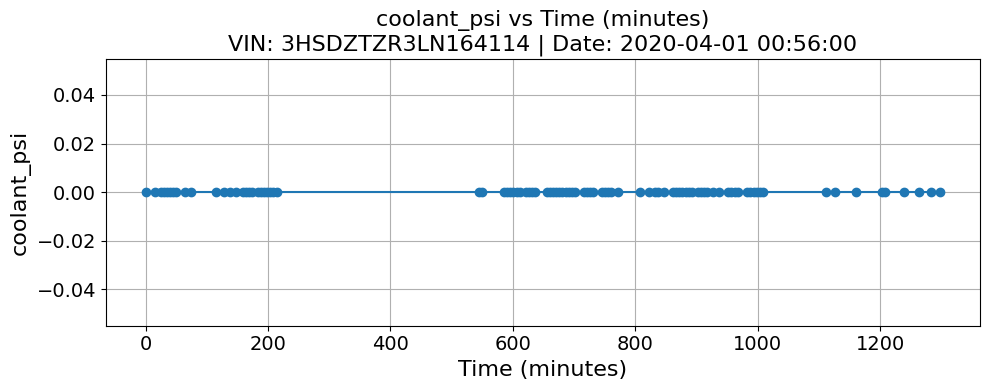

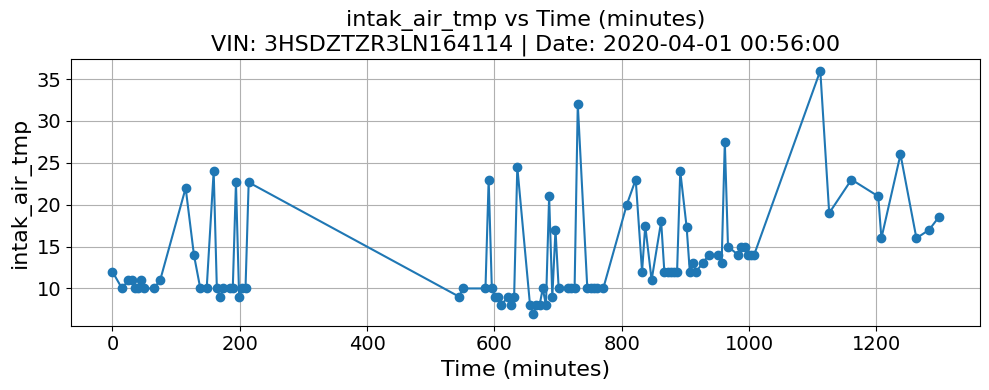

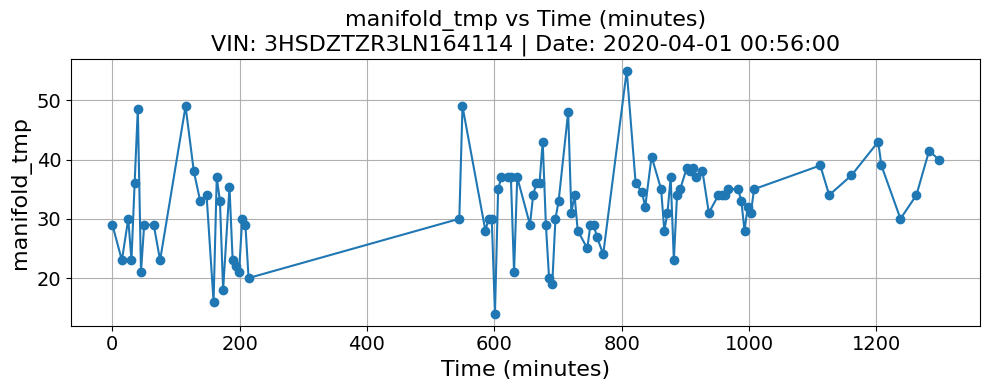

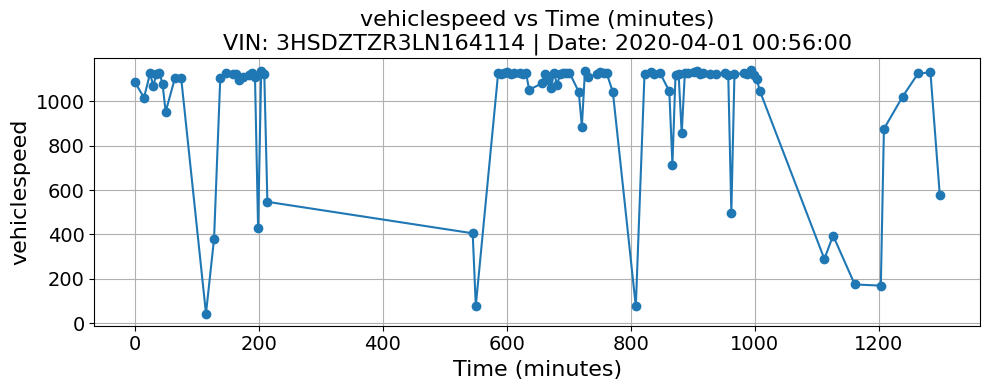

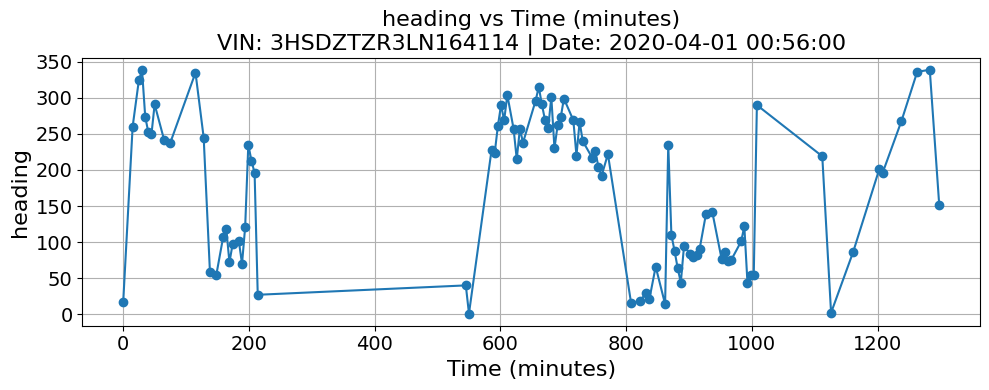

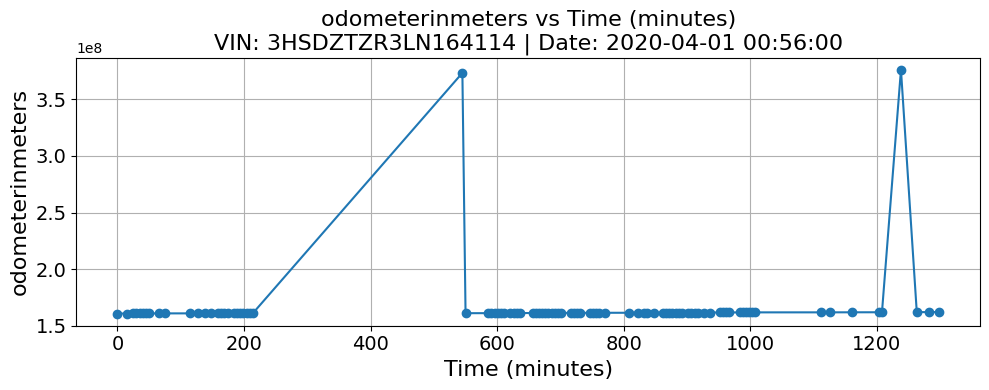

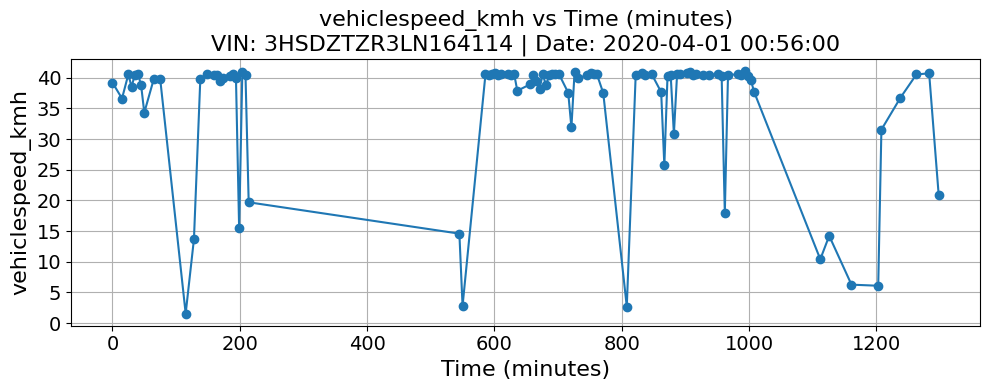

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

vin_to_analyze = "3HSDZTZR3LN164114"          # 👉 e.g., "1HGCM82633A123456"
date_to_analyze = "2020-04-01 00:56:00"  

df['msg_ts'] = pd.to_datetime(df['msg_ts'])

# Filter by VIN and date
filtered_df = df[
    (df['vin'] == vin_to_analyze) &
    (df['msg_ts'].dt.date == pd.to_datetime(date_to_analyze).date())
].copy()

# Create 'time_minutes' column
filtered_df['time_minutes'] = (
    filtered_df['msg_ts'].dt.hour * 60 +
    filtered_df['msg_ts'].dt.minute +
    filtered_df['msg_ts'].dt.second / 60
)

# Drop non-numeric or irrelevant columns
non_features = ['vin', 'msg_ts', 'time_minutes']
feature_columns = [col for col in filtered_df.columns if col not in non_features and pd.api.types.is_numeric_dtype(filtered_df[col])]

# Interpolate missing values (optional)
filtered_df[feature_columns] = filtered_df[feature_columns].interpolate(method='linear', limit_direction='both')

# Plot each feature separately with bigger fonts
for feature in feature_columns:
    plt.figure(figsize=(10, 4))
    plt.plot(filtered_df['time_minutes'], filtered_df[feature], marker='o', linestyle='-')
    plt.xlabel('Time (minutes)', fontsize=16)
    plt.ylabel(feature, fontsize=16)
    plt.title(f'{feature} vs Time (minutes)\nVIN: {vin_to_analyze} | Date: {date_to_analyze}', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


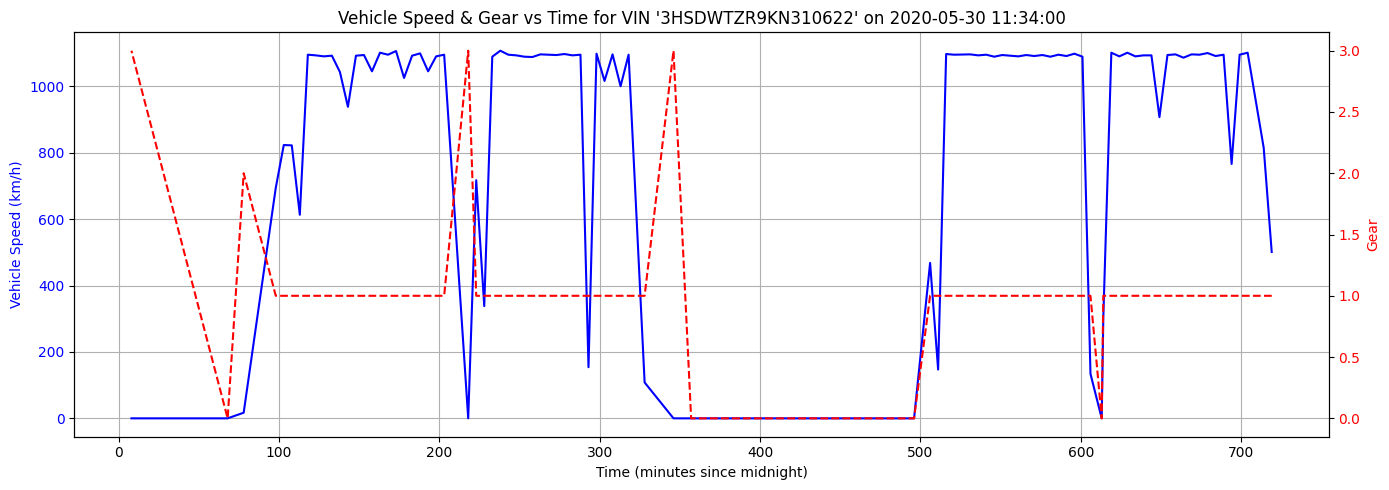

In [86]:
vin_to_analyze = "3HSDWTZR9KN310622"          # 👉 e.g., "1HGCM82633A123456"
date_to_analyze = "2020-05-30 11:34:00"               # 👉 Format: "YYYY-MM-DD"

# --- Ensure msg_ts is datetime ---
df['msg_ts'] = pd.to_datetime(df['msg_ts'], errors='coerce')

# --- Filter for VIN and date ---
filtered_df = df[
    (df['vin'] == vin_to_analyze) &
    (df['msg_ts'].dt.date == pd.to_datetime(date_to_analyze).date())
].copy()

if filtered_df.empty:
    print(f"No data for VIN '{vin_to_analyze}' on {date_to_analyze}")
else:
    # --- Convert time to minutes since midnight ---
    filtered_df['time_minutes'] = (
        filtered_df['msg_ts'].dt.hour * 60 +
        filtered_df['msg_ts'].dt.minute +
        filtered_df['msg_ts'].dt.second / 60
    )

    # --- Plot vehicle speed and gear ---
    fig, ax1 = plt.subplots(figsize=(14, 5))

    ax1.plot(filtered_df['time_minutes'], filtered_df['vehiclespeed'], 'b-', label='Vehicle Speed (km/h)')
    ax1.set_xlabel('Time (minutes since midnight)')
    ax1.set_ylabel('Vehicle Speed (km/h)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.grid(True)

    # --- Second Y axis for gear ---
    ax2 = ax1.twinx()
    ax2.plot(filtered_df['time_minutes'], filtered_df['gear'], 'r--', label='Gear')
    ax2.set_ylabel('Gear', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # --- Title and layout ---
    plt.title(f"Vehicle Speed & Gear vs Time for VIN '{vin_to_analyze}' on {date_to_analyze}")
    fig.tight_layout()
    plt.show()